In [338]:
# importing python libraries
import numpy as np              # library for numerical computations
import matplotlib.pyplot as plt # library for plots
from scipy.stats import multivariate_normal
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
# importing libraries
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from pylab import grid
from matplotlib import cm

# Training dataset

In [339]:
######################
# 1-Dimensional data #
######################

# define training data
x1_data   = [-12, -10, -5, -2.5, 2, 4, 6, 7.5]
Xtrain_1D = np.array(x1_data).reshape(len(x1_data),1)


# Functions to learn

In [340]:
###########################
# 1-Dimensional functions #
###########################

# sin + x^2

def Sin_Square_1D(X, noise=False):
    n     = 0
    y     = np.sin(X) + (X/5)**2
    if noise:
        ndata = X.shape[0]
        n     = np.random.normal(0, 3e-2, ndata)

    return y[:,0]*(1+n)

# 3 gaussians

def gaus3_func(x, noise=False):
    '''
    function that is the sum of 3 gaussians
    '''

    gaus_func = [[1.,2.,-8.],[1.5,1.5,0.],[1.4,1.,5.]]

    eval = 0

    for gi in gaus_func:
        a, std, m = gi
        eval += a/(std*2.5)*np.exp(-0.5*((x-m)/std)**2)

    noise_v = 0
    if noise:
        ndata   = x.shape[0]
        noise_v = np.random.normal(0, 1e-2, ndata)

    return (-eval)[:,0] + noise_v


In [341]:
Ytrain_SS1D = Sin_Square_1D(Xtrain_1D)
Ytrain_3G   = gaus3_func(Xtrain_1D)


# Time series prediction (dynamic systems)

In [362]:
## Predator-Prey equations (Lotka–Volterra equations)

In [363]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [364]:
### Equation integration example

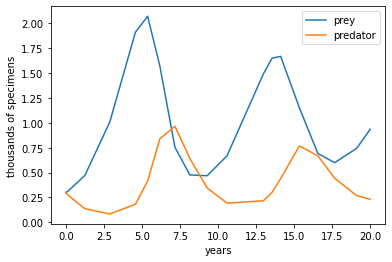

In [365]:
# define parameters
α = 2/3.; β = 4./3; γ = δ = 1.; N = 7
# define differential equaitions
def predator_preyODE(t, x):
    return [α*x[0]*(1-x[0]/N) - β*x[0]*x[1], γ*x[0]*x[1] - δ*x[1]]

t_span = [0, 20]
x0     = [0.3, 0.3]
sol1 = solve_ivp(predator_preyODE, t_span, x0)
# Note: more information can be found: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

import matplotlib.pyplot as plt
plt.plot(sol1.t,sol1.y[0], label='prey')
plt.plot(sol1.t,sol1.y[1], label='predator')
plt.xlabel("years")
plt.ylabel("thousands of specimens")
plt.legend()
plt.show()

In [367]:
# data we will use for training
train1 = solve_ivp(predator_preyODE, t_span, [0.4, 0.4])
train2 = solve_ivp(predator_preyODE, t_span, [0.6, 0.3])
train3 = solve_ivp(predator_preyODE, t_span, [0.3, 0.6])
# data we will use for testing
# test sets in time
test1  = solve_ivp(predator_preyODE, t_span, [train1.y[0][-1], train1.y[1][-1]])
test2  = solve_ivp(predator_preyODE, t_span, [train2.y[0][-1], train2.y[1][-1]])
test3  = solve_ivp(predator_preyODE, t_span, [train3.y[0][-1], train3.y[1][-1]])

# test sets in states
test4  = solve_ivp(predator_preyODE, t_span, [0.7, 0.7])
test5  = solve_ivp(predator_preyODE, t_span, [0.2, 0.2])
test6  = solve_ivp(predator_preyODE, t_span, [0.7, 0.2])

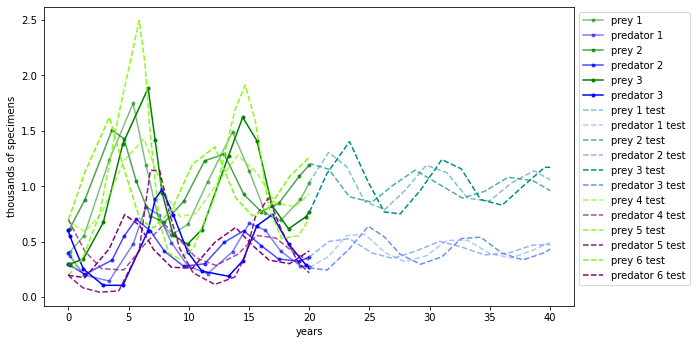

In [368]:
# training sets
fig = plt.figure()
fig.set_size_inches(9.5, 5.5)
plt.plot(train1.t,train1.y[0], label='prey 1', c='green', alpha=0.5, marker='.')
plt.plot(train1.t,train1.y[1], label='predator 1', c='blue', alpha=0.5, marker='.')
plt.plot(train2.t,train2.y[0], label='prey 2', c='green', alpha=0.7, marker='.')
plt.plot(train2.t,train2.y[1], label='predator 2', c='blue', alpha=0.7, marker='.')
plt.plot(train3.t,train3.y[0], label='prey 3', c='green', marker='.')
plt.plot(train3.t,train3.y[1], label='predator 3', c='blue', marker='.')
# test sets in time
plt.plot(20+test1.t,test1.y[0], label='prey 1 test', c='darkcyan', alpha=0.5, linestyle='--')
plt.plot(20+test1.t,test1.y[1], label='predator 1 test', c='cornflowerblue', alpha=0.5, linestyle='--')
plt.plot(20+test2.t,test2.y[0], label='prey 2 test', c='darkcyan', alpha=0.7, linestyle='--')
plt.plot(20+test2.t,test2.y[1], label='predator 2 test', c='cornflowerblue', alpha=0.7, linestyle='--')
plt.plot(20+test3.t,test3.y[0], label='prey 3 test', c='darkcyan', linestyle='--')
plt.plot(20+test3.t,test3.y[1], label='predator 3 test', c='cornflowerblue', linestyle='--')
# test sets in state
plt.plot(test4.t,test4.y[0], label='prey 4 test', c='lawngreen', alpha=0.7, linestyle='--')
plt.plot(test4.t,test4.y[1], label='predator 4 test', c='purple', alpha=0.7, linestyle='--')
plt.plot(test5.t,test5.y[0], label='prey 5 test', c='lawngreen', alpha=0.9, linestyle='--')
plt.plot(test5.t,test5.y[1], label='predator 5 test', c='purple', alpha=0.9, linestyle='--')
plt.plot(test6.t,test6.y[0], label='prey 6 test', c='lawngreen', linestyle='--')
plt.plot(test6.t,test6.y[1], label='predator 6 test', c='purple', linestyle='--')
plt.xlabel("years")
plt.ylabel("thousands of specimens")
plt.legend()
plt.legend(bbox_to_anchor=(1., 1.))

plt.show()

In [369]:
### Data preparation

x_dat = np.hstack((
    np.vstack((train1.y[:,1:] - train1.y[:,:-1], train1.y[:,:-1], train1.t[1:] - train1.t[:-1])),
    np.vstack((train2.y[:,1:] - train2.y[:,:-1], train2.y[:,:-1], train2.t[1:] - train2.t[:-1])),
    np.vstack((train3.y[:,1:] - train3.y[:,:-1], train3.y[:,:-1], train3.t[1:] - train3.t[:-1]))
))

print('data shape',x_dat.shape)

X_dy_train = x_dat[2:,:].T; Y_dy_train = x_dat[:2,:].T

data shape (5, 47)


In [388]:
import math
import torch
import gpytorch


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [389]:
# NN_dySim_test1 = NN_sim(NN_dyModel, test1.y[:,0],  test1.t.shape[0],  test1.t)
# NN_dySim_test4 = NN_sim(NN_dyModel, test4.y[:,0],  test4.t.shape[0],  test4.t)

In [390]:

t_X_dy_train = torch.from_numpy(X_dy_train) # used for training
t_X_dy_train = t_X_dy_train.float()
t_Y_dy_train = torch.from_numpy(Y_dy_train) # used for training
t_Y_dy_train = t_Y_dy_train.float()
# data treatment of training sets
t_train1_y = torch.from_numpy(train1.y[:,0])  # used for prediction
t_train1_y = t_train1_y.float()
t_train_t    = torch.from_numpy(train1.t)# used for prediction
t_train_t  = t_train_t.float()

# data treatment of test sets
t_test1_y = torch.from_numpy(test1.y[:,0])  # used for prediction
t_test1_y = t_test1_y.float()
t_test1_t    = torch.from_numpy(test1.t)# used for prediction
t_test1_t  = t_test1_t.float()

# data treatment of test sets
t_test4_y = torch.from_numpy(test4.y[:,0])  # used for prediction
t_test4_y = t_test4_y.float()
t_test4_t    = torch.from_numpy(test4.t)# used for prediction
t_test4_t  = t_test4_t.float()


In [391]:
class MultitaskGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
        
        # Number of tasks (outputs)
        self.num_tasks = train_y.shape[-1]
        
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=self.num_tasks
        )
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.RBFKernel(), num_tasks=self.num_tasks, rank=1
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)

In [392]:
likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=2)
model = MultitaskGPModel(t_X_dy_train, t_Y_dy_train, likelihood)

In [393]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iterations = 2 if smoke_test else 500


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iterations):
    optimizer.zero_grad()
    output = model(t_X_dy_train)
    loss = -mll(output, t_Y_dy_train)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f' % (i + 1, training_iterations, loss.item()))
    optimizer.step()

Iter 1/500 - Loss: 1.285
Iter 2/500 - Loss: 1.280
Iter 3/500 - Loss: 1.275
Iter 4/500 - Loss: 1.270
Iter 5/500 - Loss: 1.265
Iter 6/500 - Loss: 1.260
Iter 7/500 - Loss: 1.255
Iter 8/500 - Loss: 1.251
Iter 9/500 - Loss: 1.246
Iter 10/500 - Loss: 1.241
Iter 11/500 - Loss: 1.236
Iter 12/500 - Loss: 1.231
Iter 13/500 - Loss: 1.226
Iter 14/500 - Loss: 1.221
Iter 15/500 - Loss: 1.217
Iter 16/500 - Loss: 1.212
Iter 17/500 - Loss: 1.207
Iter 18/500 - Loss: 1.202
Iter 19/500 - Loss: 1.197
Iter 20/500 - Loss: 1.192
Iter 21/500 - Loss: 1.188
Iter 22/500 - Loss: 1.183
Iter 23/500 - Loss: 1.178
Iter 24/500 - Loss: 1.173
Iter 25/500 - Loss: 1.168
Iter 26/500 - Loss: 1.164
Iter 27/500 - Loss: 1.159
Iter 28/500 - Loss: 1.154
Iter 29/500 - Loss: 1.149
Iter 30/500 - Loss: 1.144
Iter 31/500 - Loss: 1.139
Iter 32/500 - Loss: 1.135
Iter 33/500 - Loss: 1.130
Iter 34/500 - Loss: 1.125
Iter 35/500 - Loss: 1.120
Iter 36/500 - Loss: 1.115
Iter 37/500 - Loss: 1.111
Iter 38/500 - Loss: 1.106
Iter 39/500 - Loss: 1

In [417]:
def GP_sim(gp_model, likelihood, x0, steps, DTs):
    '''This function takes a GP model and likelihood as input, 
    and simulates it from initial condition x0, for a number of steps and 
    delta t of DT per step.
    '''
    
    # Ensure the model is in evaluation mode
    gp_model.eval()
    likelihood.eval()

    NN_pred = np.zeros((len(x0), steps))
    NN_pred[:, 0] = x0
    lower = np.zeros_like(NN_pred)
    upper = np.zeros_like(NN_pred)

    if len(DTs) == 1:
        for s_i in range(1, steps):
            x_new = torch.tensor(np.hstack((NN_pred[:, s_i-1], DTs)), dtype=torch.float32)
            with torch.no_grad(), gpytorch.settings.fast_pred_var():
                # Predictive mean as the prediction
                pred_dist = likelihood(gp_model(x_new))
                pred = pred_dist.mean.numpy()
                print(pred,'pred')
                lower_i, upper_i = pred_dist.confidence_region().numpy()


                

            NN_pred[:, s_i] = NN_pred[:, s_i-1] + pred
            lower[:, s_i] = NN_pred[:, s_i-1] + lower_i.numpy()
            upper[:, s_i] = NN_pred[:, s_i-1] + upper_i.numpy()


    else:
        for s_i in range(1, steps):
            x_new = torch.tensor(np.hstack((NN_pred[:, s_i-1], DTs[s_i] - DTs[s_i-1])), dtype=torch.float32).unsqueeze(0)
            with torch.no_grad(), gpytorch.settings.fast_pred_var():
                pred_dist = likelihood(gp_model(x_new))
                pred = pred_dist.mean.numpy()
                
                lower_i, upper_i = pred_dist.confidence_region() # what is this lower and upper?
                # Predictive mean as the prediction
                # print(pred,'pred')
            NN_pred[:, s_i] = NN_pred[:, s_i-1] + pred
            # print(NN_pred[:, s_i],'NN_pred[:, s_i]')
            
            lower[:, s_i] = NN_pred[:, s_i-1] + lower_i.numpy()
            upper[:, s_i] = NN_pred[:, s_i-1] + upper_i.numpy()

            # print(lower_i, upper_i,'lower_i, upper_i')  


    return NN_pred,lower,upper

In [434]:
train_predictions ,train_lower_bound,train_upper_bound= GP_sim(model, likelihood, t_train1_y,t_train_t.shape[0],t_train_t )

test1_predictions ,test1_lower_bound,test1_upper_bound= GP_sim(model, likelihood, t_test1_y,t_test1_t.shape[0],t_test1_t )

test4_predictions ,test4_lower_bound,test4_upper_bound= GP_sim(model, likelihood, t_test4_y,t_test4_t.shape[0],t_test4_t )

In [427]:
train_lower_bound[0][0] = train_predictions[0][0]
train_lower_bound[1][0] = train_predictions[1][0]
train_upper_bound[0][0] = train_predictions[0][0]
train_upper_bound[1][0] = train_predictions[1][0]

In [435]:
test1_lower_bound[0][0] = test1_predictions[0][0]
test1_lower_bound[1][0] = test1_predictions[1][0]
test1_upper_bound[0][0] = test1_predictions[0][0]
test1_upper_bound[1][0] = test1_predictions[1][0]


In [436]:
test4_lower_bound[0][0] = test4_predictions[0][0]
test4_lower_bound[1][0] = test4_predictions[1][0]
test4_upper_bound[0][0] = test4_predictions[0][0]
test4_upper_bound[1][0] = test4_predictions[1][0]


<Figure size 936x576 with 0 Axes>

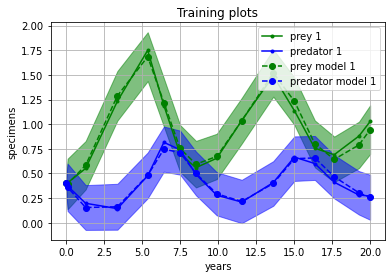

In [432]:
plt.figure(figsize=(13,8))
fig, ax = plt.subplots()
ax.plot(train1.t,train1.y[0],              label='prey 1', c='green', marker='.')
ax.plot(train1.t,train1.y[1],              label='predator 1', c='blue', marker='.')
ax.plot(train1.t,train_predictions[0], '--', label='prey model 1', c='green', marker='o')
ax.plot(train1.t,train_predictions[1], '--', label='predator model 1', c='blue', marker='o')
ax.fill_between(train1.t,train_lower_bound[0],train_upper_bound[0], alpha=0.5,color='green')
ax.fill_between(train1.t,train_lower_bound[1],train_upper_bound[1], alpha=0.5,color='blue')
ax.set_xlabel("years")
ax.set_ylabel("specimens")
ax.set_title('Training plots')
ax.legend()
grid(True)
plt.show()

<Figure size 936x576 with 0 Axes>

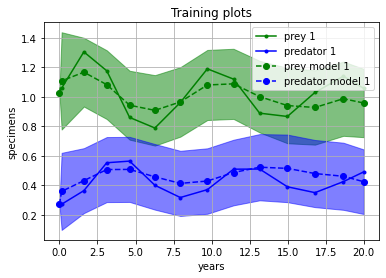

In [437]:
plt.figure(figsize=(13,8))
fig, ax = plt.subplots()
ax.plot(test1.t,test1.y[0],              label='prey 1', c='green', marker='.')
ax.plot(test1.t,test1.y[1],              label='predator 1', c='blue', marker='.')
ax.plot(test1.t,test1_predictions[0], '--', label='prey model 1', c='green', marker='o')
ax.plot(test1.t,test1_predictions[1], '--', label='predator model 1', c='blue', marker='o')
ax.fill_between(test1.t,test1_lower_bound[0],test1_upper_bound[0], alpha=0.5,color='green')
ax.fill_between(test1.t,test1_lower_bound[1],test1_upper_bound[1], alpha=0.5,color='blue')
ax.set_xlabel("years")
ax.set_ylabel("specimens")
ax.set_title('Training plots')
ax.legend()
grid(True)
plt.show()

<Figure size 936x576 with 0 Axes>

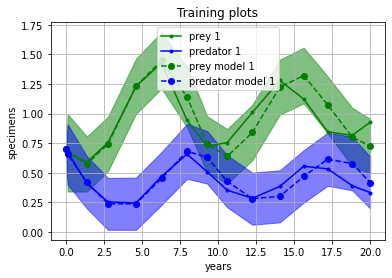

In [438]:
plt.figure(figsize=(13,8))
fig, ax = plt.subplots()
ax.plot(test4.t,test4.y[0],              label='prey 1', c='green', marker='.')
ax.plot(test4.t,test4.y[1],              label='predator 1', c='blue', marker='.')
ax.plot(test4.t,test4_predictions[0], '--', label='prey model 1', c='green', marker='o')
ax.plot(test4.t,test4_predictions[1], '--', label='predator model 1', c='blue', marker='o')
ax.fill_between(test4.t,test4_lower_bound[0],test4_upper_bound[0], alpha=0.5,color='green')
ax.fill_between(test4.t,test4_lower_bound[1],test4_upper_bound[1], alpha=0.5,color='blue')
ax.set_xlabel("years")
ax.set_ylabel("specimens")
ax.set_title('Training plots')
ax.legend()
grid(True)
plt.show()
